1. Start by installing and loading the BioMark library as follows:

 安装并加载BioMark包

In [1]:
#install.packages("BioMark")
library(BioMark)

Installing package into 'C:/Users/acer/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'entropy', 'sda', 'fdrtool', 'corpcor', 'pls', 'glmnet', 'st'



package 'entropy' successfully unpacked and MD5 sums checked
package 'sda' successfully unpacked and MD5 sums checked
package 'fdrtool' successfully unpacked and MD5 sums checked
package 'corpcor' successfully unpacked and MD5 sums checked
package 'pls' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked
package 'st' successfully unpacked and MD5 sums checked
package 'BioMark' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acer\AppData\Local\Temp\RtmpsBLeOT\downloaded_packages


Warning message:
"package 'BioMark' was built under R version 3.5.3"Loading required package: pls
Warning message:
"package 'pls' was built under R version 3.5.3"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings

Loading required package: glmnet
Warning message:
"package 'glmnet' was built under R version 3.5.3"Loading required package: Matrix
Loading required package: foreach
Warning message:
"package 'foreach' was built under R version 3.5.3"Loaded glmnet 2.0-16

Loading required package: MASS
Loading required package: st
Warning message:
"package 'st' was built under R version 3.5.3"Loading required package: sda
Warning message:
"package 'sda' was built under R version 3.5.3"Loading required package: entropy
Warning message:
"package 'entropy' was built under R version 3.5.2"Loading required package: corpcor
Warning message:
"package 'corpcor' was built under R version 3.5.2"Loading required package: fdrtool
Warning message:
"package 'fdrt

2. Once you have loaded the library,use the gen.data function to simulate a dataset for use. By default, it simulated the data for five biomarkers, but this can be altered with the nbiom argument as follows:

 利用gen.data()函数造一个数据集供我们使用。默认该数据集有5个生物标记，但是可以通过nbiom改动：

In [2]:
simdata <- gen.data(ncontrol=10, nvar=500, nsimul=1, group.diff=1.5)

3. Check the contents of the dataset as follows:

 检查该数据内容：

In [3]:
class(simdata)
str(simdata$X)

[1] "list"

 num [1:20, 1:500, 1] -2.66 1.42 0.852 0.815 -2.705 ...


4. The real biomarkers in the generated dataset are the first five variables; therefore, you can assign it to an R object for evaluation purposes, as follows:

 生成的数据集中真正的生物标志物是前五个变量;因此，您可以将其分配给R对象以进行评估:

In [4]:
myrealMarkers <- c(1,2,3,4,5)

5. Now, use the get.biom function to look for the biomarkers in the dataset. Use the pls method for this purpose as follows:

 利用get.biom函数查看该数据集的生物标记物，方法用pls。

In [5]:
myBiom <- get.biom(X = simdata$X[1:20,,1], Y=simdata$Y, fmethod="pls", type="HC")

6. Once you have selected the biomarkers,take a look at the ranked variable's indices with the following command:

选择好生物标记物后，查看变量的排名：

In [6]:
selection(myBiom)

$pls
$pls[[1]]
[1]   5   3   4 422 180 124  71

7. Once you have the results, obseve the performance measure in terms of the ROC curve, as follows, for the top five biomarkers selected from the results:

 观察从结果中筛选出的前5个生物标志物的ROC曲线表现测度如下:

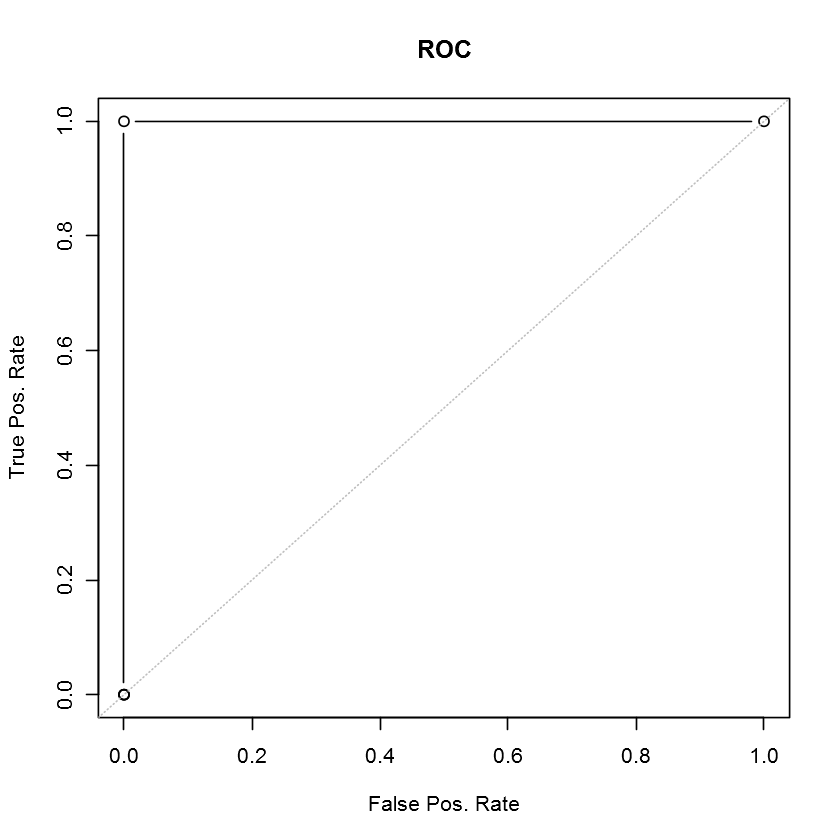

In [7]:
myROC <- ROC(1/coef(myBiom)$pls[[1]][1:5],myrealMarkers)
plot(myROC)